# HW3

### Samir Patel
### DATA 515a
### 4/20/2017


For this homework, you are a data scientist working for Pronto (before the end of their contract with the City of Seattle). Your job is to assist in determining how to do end-of-day adjustments in the number of bikes at stations so that all stations will have enough bikes for the next day of operation (as estimated by the weekday average for the station for the year). Your assistance will help in constructing a plan for each day of the week that specifies how many bikes should be moved from each station and how many bikes must be delievered to each station.

Your assignment is to construct plots of the differences between 'from' and 'to' counts for each station by day of the week. Do this as a set of 7 subplots. You should use at least one function to construct your plots.

### Grading
- 2-pts: create a dataframe with station counts averages by day-of-week
- 1-pt: structure the 7 day-of-week plots as subplots
- 1-pt: label the plots by day-of-week
- 1-pt: label the x-axis for plots in the last row and label the y-axis for plots in the left-most column


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("2015_trip_data.csv")

Obtaining day of the week for start_weekday and stop_weekday columns using Pandas "to_datetime" function.  
Obtaining date (sans time) using Pandas "to_datetime" function.

Then adding to dataframe.

In [3]:
start_weekday = [pd.to_datetime(x).dayofweek for x in df.starttime]
stop_weekday = [pd.to_datetime(x).dayofweek for x in df.stoptime]

In [4]:
df['startweekday'] = start_weekday  # Creates a new column named 'startday'
df['stopweekday'] = stop_weekday

In [5]:
startdate =  pd.DatetimeIndex(df['starttime'])
df['date'] = startdate.date

Taking new date column, removing duplicate dates and then grouping to determine the unique counts of each of the 7 weekdays (i.e. how many days of the week occurred in the dataset)

In [6]:
t1 = startdate.date
t2 = pd.DataFrame(t1)
t3 = t2.drop_duplicates()
t4 =  pd.DatetimeIndex(t3[0])
t5 = pd.DataFrame(t4.dayofweek)

In [7]:
day_counts = pd.value_counts(t5[0]).sort_index()
groupby_day_from = df.groupby(['from_station_id', 'startweekday']).size()
groupby_day_to = df.groupby(['to_station_id', 'stopweekday']).size()
df_counts = pd.DataFrame({'From': groupby_day_from, 'To': groupby_day_to})

Calculating average counts ("From", "To" and "To-From" (delta)) and adding into a dataframe with new headers.

In [8]:
dict_fromavg = {}
dict_toavg = {}
dict_deltaavg = {}

for station in df_counts.index.levels[0]:
    dict_fromavg[station] = df_counts.From[station]/day_counts
    dict_toavg[station] = df_counts.To[station]/day_counts
    dict_deltaavg[station] = (df_counts.To[station]- df_counts.From[station])/day_counts

In [9]:
from_avg = pd.DataFrame(dict_fromavg)
from_avg = pd.DataFrame(from_avg.unstack())

to_avg = pd.DataFrame(dict_toavg)
to_avg = pd.DataFrame(to_avg.unstack())

delta_avg = pd.DataFrame(dict_deltaavg)
delta_avg = pd.DataFrame(delta_avg.unstack())

In [10]:
df_counts = df_counts.join(from_avg)
df_counts.columns.values[2] = 'From_Counts_Avg'
df_counts = df_counts.join(to_avg)
df_counts.columns.values[3] = 'To_Counts_Avg'
df_counts = df_counts.join(delta_avg)
df_counts.columns.values[4] = 'Delta_Avg'
df_counts2 = df_counts.unstack()
df_counts2 = df_counts2[df_counts2.index != 'Pronto shop']

Dataframe below contains station counts by day-of-week for station for bikes "From" and "To" a station.

In addition, it contains "From", "To" and "Delta_Avg" averages for each day-of-week.

In [17]:
df_counts2.head()

From                                                To                \
            0      1      2      3      4       5      6      0      1      2   
BT-01   806.0  724.0  679.0  801.0  921.0  1148.0  806.0  791.0  675.0  696.0   
BT-03   577.0  594.0  620.0  606.0  657.0   597.0  548.0  534.0  513.0  525.0   
BT-04   387.0  351.0  342.0  370.0  343.0   222.0  206.0  328.0  292.0  298.0   
BT-05   500.0  491.0  462.0  496.0  516.0   505.0  398.0  507.0  501.0  489.0   
CBD-03  467.0  453.0  443.0  476.0  465.0   309.0  361.0  623.0  596.0  617.0   

          ...    To_Counts_Avg                       Delta_Avg            \
          ...                4          5          6         0         1   
BT-01     ...        16.403846  21.942308  16.403846 -0.283019 -0.942308   
BT-03     ...         9.057692   8.250000   8.942308 -0.811321 -1.557692   
BT-04     ...         5.307692   3.884615   3.326923 -1.113208 -1.134615   
BT-05     ...         9.576923   9.692308   7.884615  0.132075  0.192308   
CBD-03    ...        12.288462   8.615385   8.192308  2.943396  2.750000   

                                                          
               2         3         4         5         6  
BT-01   0.326923 -0.192308 -1.307692 -0.134615  0.903846  
BT-03  -1.826923 -3.019231 -3.576923 -3.230769 -1.596154  
BT-04  -0.846154 -1.596154 -1.288462 -0.384615 -0.634615  
BT-05   0.519231  1.038462 -0.346154 -0.019231  0.230769  
CBD-03  3.346154  2.576923  3.346154  2.673077  1.250000  

[5 rows x 35 columns]

Adding plot_bar1 function for single plot creation (given inputs of dataframe, columns to plot and plotting options)

In [105]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    if 'xlabel' in opts:
      plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
      plt.ylabel(opts['ylabel'])
    if 'xticks' in opts and opts['xticks']:
      plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ['' for x in df.index]
      plt.xticks(index, labels)   
    if 'ylim' in opts:
      plt.ylim(opts['ylim'])
    if 'title' in opts:
      plt.title(opts['title'])

Adding plot_barN function for creating subplots.

In [106]:
def plot_barN(df, columns, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: key is plot attribute
    """
    num_columns = len(columns)
    local_opts = dict(opts)  # Make a deep copy of the object
    idx = 0
    for column in columns:
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        if idx == num_columns:
          local_opts['xticks'] = True
          local_opts['xlabel'] = opts['xlabel']
        plt.subplot(num_columns, 1, idx)
        plot_bar1(df, column, local_opts)
        local_opts['title'] = columns  #add title to opts at the end of loop
        plt.title(opts['title'][idx-1]) #add title to each subplot


Creating subplots for the average difference of bike counts "To" a station minus "From" a station" for each day of the week.

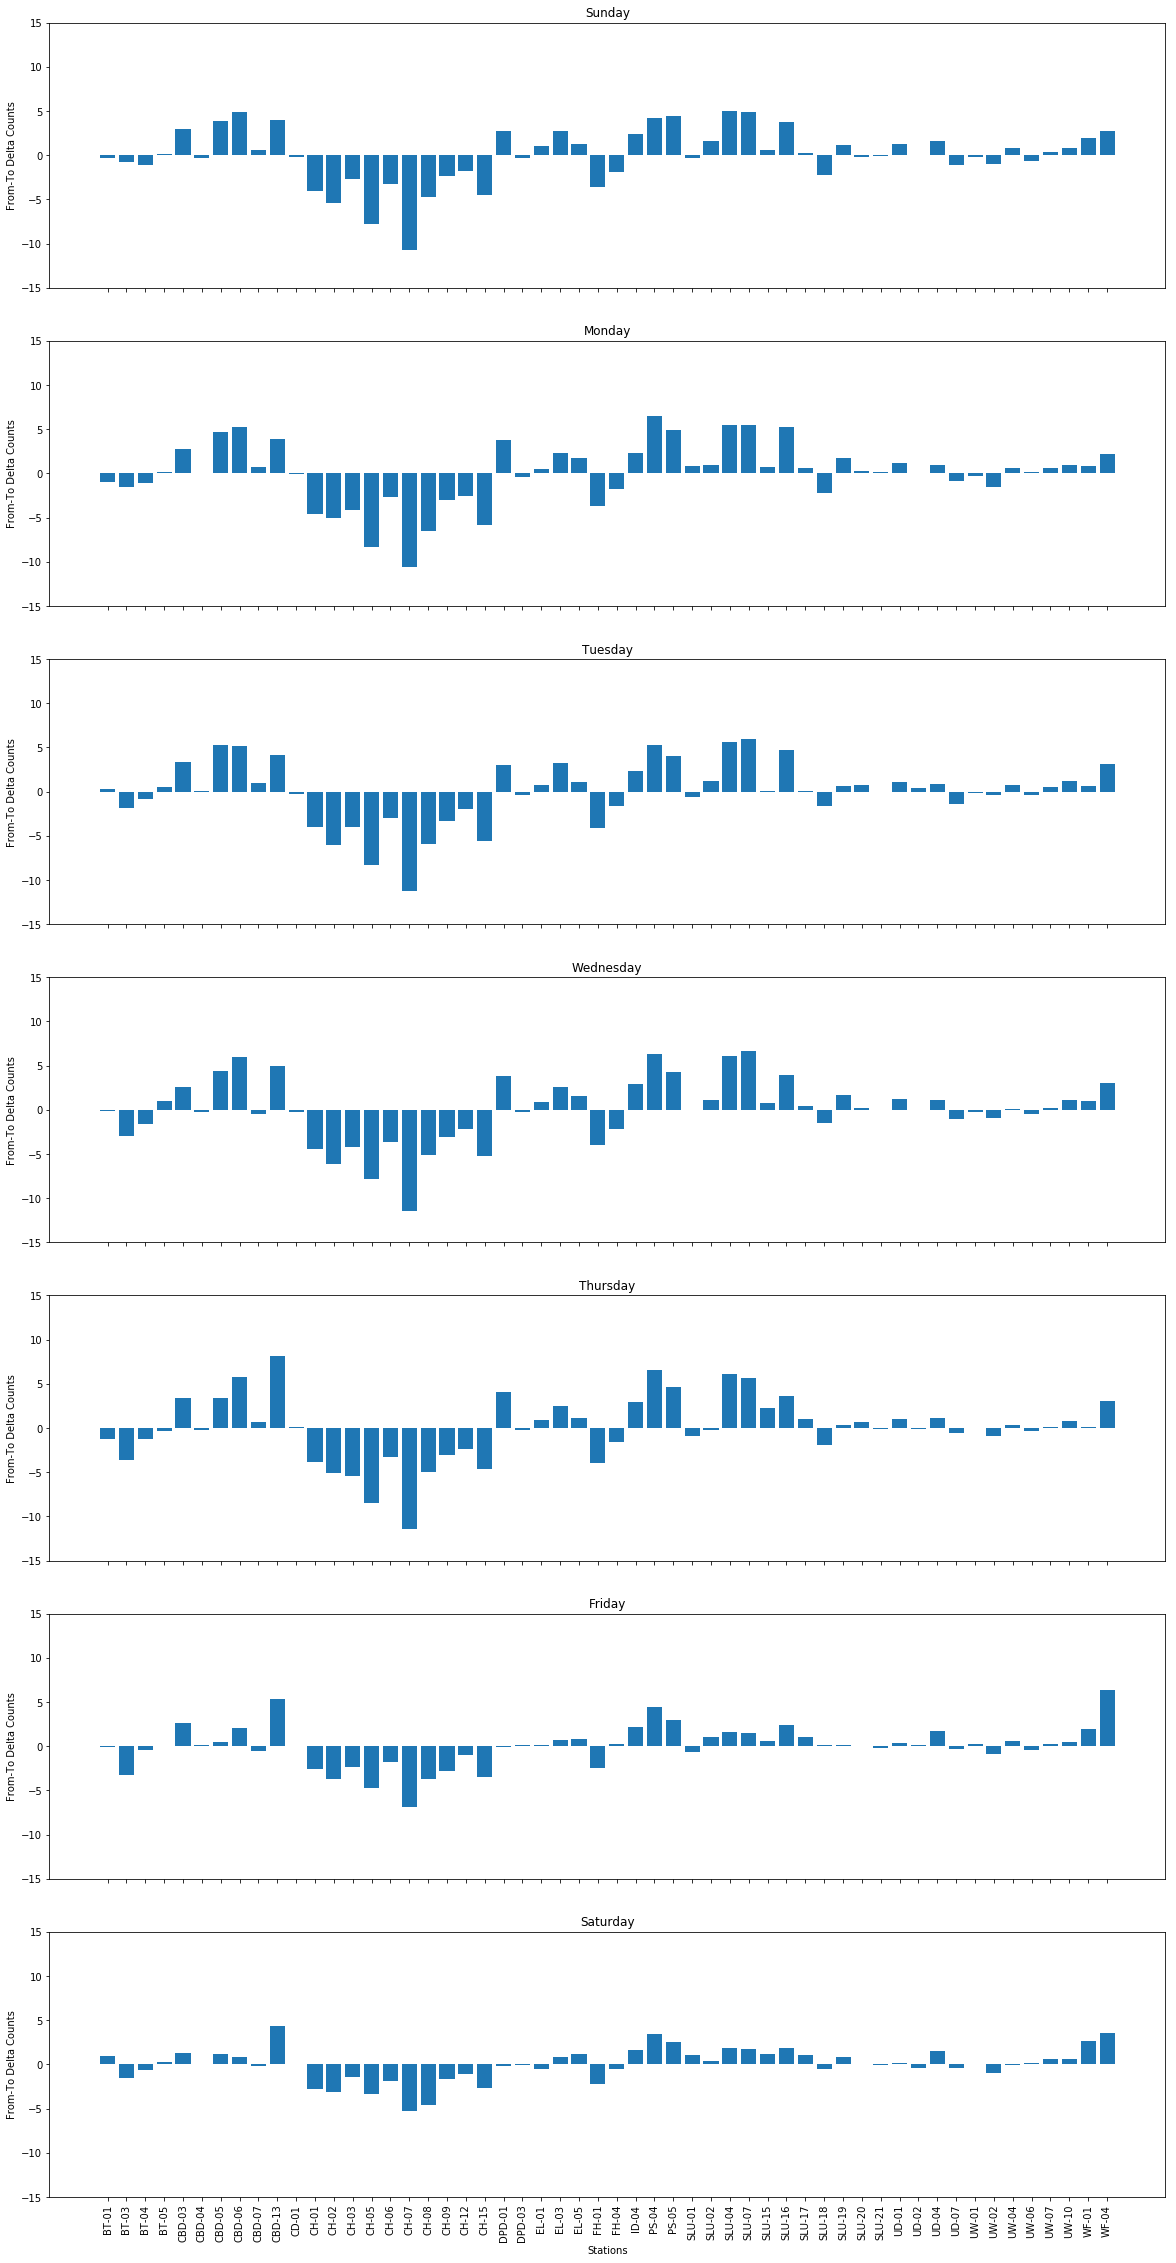

In [107]:
fig = plt.figure(figsize=(20, 40))  # Controls global properties of the bar plot
opts = {'xlabel': 'Stations', 'ylabel': 'From-To Delta Counts', 'ylim': [-15, 15], 'title': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']}
plot_barN(df_counts2.Delta_Avg, [0,1,2,3,4,5,6], opts)